<a href="https://colab.research.google.com/github/ngcthanh2903/AI-homework/blob/main/money/money.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [2]:
import cv2 as cv #thư viện opencv để xử lý ảnh thô chuyển thành dữ liệu
import numpy as np # thư viện numpy
import os #lấy đường dẫn tới thư mục chứa hình ảnh

In [121]:
import tensorflow as tf 
kernel = np.array([[-1,-1,-1], 
                       [-1, 9.05,-1],
                       [-1,-1,-1]])
X = []#tạo list chứa dữ liệu ảnh
y = []#tạo list chứa label của từng ảnh
labels = os.listdir('/content/drive/MyDrive/money')#gọi biến labels là list gồm các thư mục data con chứa ảnh 


#tạo đường dẫn vào vào dataset
path='/content/drive/MyDrive'
dataset = 'money'

#cho biến label trong vòng lặp list labels 
for label in labels:
        
        # Và lặp các ảnh trong thư mục
        for file in os.listdir(os.path.join(path, dataset, label)):
            # đọc ảnh            
            image = cv.imread(os.path.join(path, dataset, label, file),cv.IMREAD_UNCHANGED)
            #chuyển ảnh cấu trúc màu BGR thành RGB
            image =cv.cvtColor(image,cv.COLOR_BGR2RGB)
            image =cv.GaussianBlur(image,(5,5),0,0)
            # chuyển tên các label thành dạng số 
            classnum = labels.index(label)
            #đưa shape ảnh về kích thước 150x150
            img = cv.resize(image,(200,200))

            #sữ lý độ sáng và độ tương phản
            img= cv.filter2D(img, -1, kernel)
            img = cv.normalize(img, None, alpha=0,beta=210, norm_type=cv.NORM_MINMAX)
            img = tf.image.adjust_brightness(img,0.2)
            img = tf.image.adjust_contrast(img,1)
            
            #đưa dữ liệu ảnh đc xử lý vào list X          
            X.append(img)
            #đưa dữ liệu label vào list y
            y.append(classnum)

In [122]:
#đưa list X về dữ liệu dạng mảng tensor
X= np.array(X)
#đưa list y vễ dạng mảng
y= np.array(y)

In [112]:
X.shape

(110, 200, 200, 3)

In [113]:
y.shape

(110,)

In [114]:
y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5,
       5, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7,
       8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9])

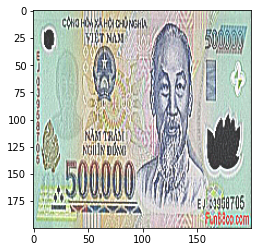

In [123]:
plt.imshow(X[50])

In [136]:
import tensorflow as tf 
x_leftright = []
y_leftright  = []
for i in range(X.shape[0]):
  xi = tf.image.flip_left_right(X[i])
  yi = y[i]
  x_leftright.append(xi)
  y_leftright.append(yi)

In [137]:
x_leftright = np.array(x_leftright)
y_leftright = np.array(y_leftright)


In [138]:
y_leftright

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5,
       5, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7,
       8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9])

9


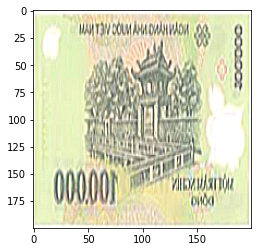

In [144]:
plt.imshow(x_leftright[-1])
print(y_leftright[-1])

In [150]:
import tensorflow as tf 
x_updown = []
y_updown  = []
for i in range(X.shape[0]):
  xi = tf.image.flip_up_down(x_leftright[i])
  yi = y[i]
  x_updown.append(xi)
  y_updown.append(yi)

In [151]:
x_updown = np.array(x_updown)
y_updown = np.array(y_updown)

0


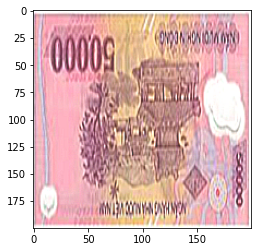

In [153]:
plt.imshow(x_updown[1])
print(y_updown[1])

In [154]:
X_train = np.concatenate((X,x_leftright,x_updown))
Y_train = np.concatenate((y,y_leftright,y_updown))

In [156]:
Y_train.shape

(330,)

In [158]:
X_train.shape

(330, 200, 200, 3)

In [160]:
keys = np.array(range(X_train.shape[0]))
np.random.shuffle(keys)
x_train = X_train[keys]
y_train = Y_train[keys]

In [161]:
y_train

array([1, 1, 6, 7, 5, 8, 7, 5, 9, 1, 8, 9, 1, 9, 5, 2, 7, 0, 3, 8, 2, 0,
       4, 7, 3, 8, 2, 7, 5, 8, 7, 9, 7, 6, 4, 9, 1, 6, 6, 7, 2, 2, 6, 1,
       3, 1, 1, 0, 8, 7, 9, 4, 0, 0, 4, 8, 4, 2, 6, 0, 4, 8, 2, 6, 3, 4,
       8, 0, 7, 1, 0, 7, 1, 5, 3, 0, 0, 2, 5, 3, 7, 5, 5, 0, 0, 7, 5, 8,
       0, 1, 5, 4, 1, 3, 2, 8, 6, 3, 3, 2, 5, 7, 3, 9, 8, 7, 3, 9, 2, 0,
       8, 1, 5, 4, 3, 5, 5, 9, 5, 6, 8, 1, 2, 0, 9, 3, 4, 4, 2, 8, 0, 5,
       3, 8, 1, 0, 1, 9, 5, 6, 4, 0, 1, 6, 3, 0, 8, 8, 2, 3, 8, 1, 0, 6,
       4, 0, 0, 2, 2, 7, 3, 6, 3, 1, 2, 0, 7, 9, 5, 0, 1, 4, 3, 7, 1, 7,
       5, 3, 2, 7, 6, 6, 9, 0, 4, 4, 6, 8, 3, 3, 5, 6, 6, 7, 9, 1, 9, 6,
       5, 2, 8, 1, 7, 7, 7, 4, 0, 8, 2, 6, 6, 9, 9, 5, 0, 4, 1, 2, 0, 9,
       6, 5, 3, 1, 0, 2, 1, 1, 9, 4, 3, 5, 8, 2, 9, 1, 4, 4, 2, 6, 4, 1,
       2, 6, 4, 8, 5, 5, 0, 8, 0, 6, 0, 1, 8, 9, 9, 8, 6, 3, 5, 8, 7, 1,
       2, 4, 3, 4, 4, 7, 9, 8, 8, 6, 4, 3, 9, 4, 9, 5, 4, 9, 9, 6, 5, 2,
       0, 2, 8, 9, 9, 0, 2, 1, 1, 6, 7, 5, 6, 5, 9,

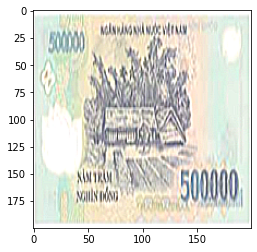

In [210]:
plt.imshow(x_train[22])

In [168]:
from tensorflow.keras.utils import to_categorical
#onehot label y 
y_train= to_categorical(y_train,10)

In [169]:
y_train.shape

(330, 10)

In [182]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Dense, Flatten,Dropout
model = Sequential()

model.add(Conv2D(filters=32,  kernel_size=(3,3), activation='relu', kernel_initializer='he_uniform', padding='same', input_shape=(200,200,3), strides=(2,2)))
model.add(MaxPooling2D(2,2))

model.add(Conv2D(filters=64,  kernel_size=(3,3),  activation='relu', kernel_initializer='he_uniform',padding='same'))
model.add(MaxPooling2D(2,2))

model.add(Conv2D(filters=128,kernel_size=(3,3),  activation='relu',kernel_initializer='he_uniform',padding='same'))
model.add(MaxPooling2D(2,2))

model.add(Flatten())
model.add(Dense(1028, activation='relu')) 
model.add(Dropout(0.2))
model.add(Dense(512, activation='relu')) 
model.add(Dropout(0.2))
model.add(Dense(10, activation='softmax'))

model.summary()

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_21 (Conv2D)          (None, 100, 100, 32)      896       
                                                                 
 max_pooling2d_21 (MaxPoolin  (None, 50, 50, 32)       0         
 g2D)                                                            
                                                                 
 conv2d_22 (Conv2D)          (None, 50, 50, 64)        18496     
                                                                 
 max_pooling2d_22 (MaxPoolin  (None, 25, 25, 64)       0         
 g2D)                                                            
                                                                 
 conv2d_23 (Conv2D)          (None, 25, 25, 128)       73856     
                                                                 
 max_pooling2d_23 (MaxPoolin  (None, 12, 12, 128)     

In [192]:
model=Sequential()
model.add(Conv2D(32,(3,3),activation='relu',kernel_initializer='he_uniform',padding='same', input_shape=(200,200,3)))
model.add(Conv2D(32,(3,3),activation='relu',kernel_initializer='he_uniform',padding='same'))
model.add(MaxPooling2D((2,2),strides = 2))


model.add(Conv2D(64,(3,3),activation='relu',kernel_initializer='he_uniform',padding='same'))
model.add(MaxPooling2D((2,2)))

model.add(Conv2D(128,(2,2),activation='relu',kernel_initializer='he_uniform',padding='same'))
model.add(MaxPooling2D((2,2)))

model.add(Conv2D(512,(2,2),activation='relu',kernel_initializer='he_uniform',padding='same'))
model.add(MaxPooling2D((2,2)))


model.add(Flatten())
model.add(Dense(256,activation='relu',kernel_initializer='he_uniform'))
model.add(Dense(10,activation='softmax'))
model.summary()

Model: "sequential_14"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_54 (Conv2D)          (None, 200, 200, 32)      896       
                                                                 
 conv2d_55 (Conv2D)          (None, 200, 200, 32)      9248      
                                                                 
 max_pooling2d_39 (MaxPoolin  (None, 100, 100, 32)     0         
 g2D)                                                            
                                                                 
 conv2d_56 (Conv2D)          (None, 100, 100, 64)      18496     
                                                                 
 max_pooling2d_40 (MaxPoolin  (None, 50, 50, 64)       0         
 g2D)                                                            
                                                                 
 conv2d_57 (Conv2D)          (None, 50, 50, 128)     

In [193]:
#gọi hàm loss
from keras.backend import categorical_crossentropy
#gọi opimizer
from tensorflow.keras.optimizers import Adam,SGD

#opt= SGD(lr=0.01,momentum=0.9)
#sử dụng optimizer Adam
opt =Adam()
#cấu hình train
model.compile(opt,loss='categorical_crossentropy',metrics=['accuracy'])
#bỏ dữ liệu vô train
history = model.fit(x_train, y_train, epochs=20, batch_size=64, validation_split=(0.1), verbose=1)
#lưu model
model.save('final.h5')

Epoch 1/20
5/5 [==============================] - 49s 9s/step - loss: 10713.6592 - accuracy: 0.0875 - val_loss: 3139.4180 - val_accuracy: 0.1212
Epoch 2/20
5/5 [==============================] - 48s 10s/step - loss: 2213.2800 - accuracy: 0.0774 - val_loss: 559.5704 - val_accuracy: 0.1212
Epoch 3/20
5/5 [==============================] - 48s 10s/step - loss: 324.2487 - accuracy: 0.0909 - val_loss: 52.0547 - val_accuracy: 0.1818
Epoch 4/20
5/5 [==============================] - 47s 9s/step - loss: 29.1075 - accuracy: 0.2391 - val_loss: 7.9696 - val_accuracy: 0.3333
Epoch 5/20
5/5 [==============================] - 51s 10s/step - loss: 4.2517 - accuracy: 0.3737 - val_loss: 0.9838 - val_accuracy: 0.7273
Epoch 6/20
5/5 [==============================] - 48s 9s/step - loss: 0.9783 - accuracy: 0.6970 - val_loss: 0.6485 - val_accuracy: 0.7576
Epoch 7/20
5/5 [==============================] - 47s 9s/step - loss: 0.3322 - accuracy: 0.9428 - val_loss: 0.2115 - val_accuracy: 1.0000
Epoch 8/20
5/5 

In [212]:
model.save('money.h5')

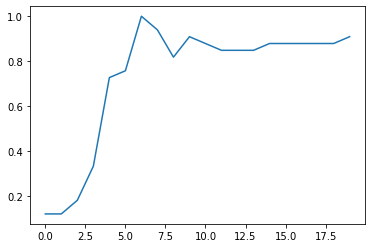

In [194]:
plt.plot(history.history['val_accuracy'])

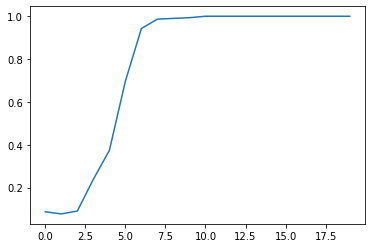

In [195]:
plt.plot(history.history['accuracy'])

In [211]:
labels= {0:'50k',
         1:'10k',
         2:'1k',
         3:'200k',
         4:'500k',
         5:'2k',
         6:'500đ',
         7:'20k',
         8:'5k',
         9:'100k'}

[[2.1393917e-06 1.0938949e-05 9.9861312e-01 6.8221598e-06 4.5920621e-07
  1.2706302e-04 3.2456446e-05 2.2641379e-05 7.4929162e-04 4.3501391e-04]]
độ chính xác: 99 %
expectation 1k


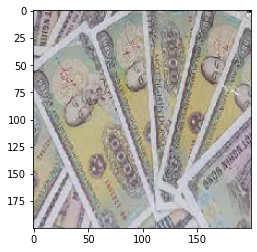

In [214]:
from keras.preprocessing.image import load_img
from keras.preprocessing.image import img_to_array 
from keras.models import load_model
import numpy as np  
import matplotlib.pyplot as plt
import cv2 

# load and prepare the image
def load_image(filename):
	# load the image
	img = load_img(filename, target_size=(200, 200))	
	
	return img
model = load_model('money.h5')
	# load model
img = load_image('1k.jpg')
plt.imshow(img)
img = img_to_array(img)
#img= cv.GaussianBlur(img,(35,35),0,0)

img = img.reshape(1,200,200,3)  
img.shape
result = model.predict(img)
print(result)
np.argmax(result) 
print('độ chính xác:', int(np.max(result)*100),'%')
print('expectation',labels[np.argmax(result)])

[[2.9760776e-07 5.1383720e-09 9.7738963e-01 7.2878692e-07 1.2990602e-05
  8.9371986e-07 2.2576867e-02 4.0097466e-06 3.5483081e-06 1.1013504e-05]]
độ chính xác: 97 %
expectation 1k


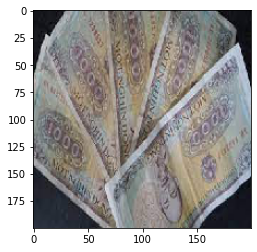

In [234]:
img = load_image('1k(1).jpg')
plt.imshow(img)
img = img_to_array(img)
#img= cv.GaussianBlur(img,(35,35),0,0)

img = img.reshape(1,200,200,3)  
img.shape
result = model.predict(img)
print(result)
np.argmax(result) 
print('độ chính xác:', int(np.max(result)*100),'%')
print('expectation',labels[np.argmax(result)])

[[8.0102112e-11 1.1646928e-09 9.9999988e-01 3.5647973e-10 4.2158278e-16
  1.0050971e-09 1.1711440e-09 8.7595001e-12 2.1705906e-08 4.5313861e-08]]
độ chính xác: 99 %
expectation 1k


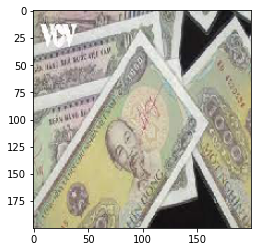

In [235]:
img = load_image('1k(3).jpg')
plt.imshow(img)
img = img_to_array(img)
img = img.reshape(1,200,200,3)  
#img = tf.image.adjust_brightness(img,0.2)
#img = tf.image.adjust_contrast(img,1)
img.shape
result = model.predict(img)
print(result)
np.argmax(result) 
print('độ chính xác:', int(np.max(result)*100),'%')
print('expectation',labels[np.argmax(result)])

[[1.1330748e-10 1.3289992e-09 9.9403000e-01 1.6602556e-13 2.3326491e-05
  5.9175543e-03 2.1345229e-05 1.2156272e-06 1.5148618e-08 6.5946970e-06]]
độ chính xác: 99 %
expectation 1k


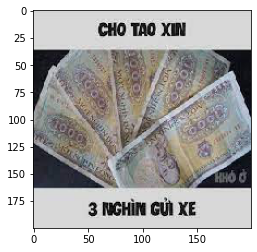

In [237]:
img = load_image('1k(4).jpg')
plt.imshow(img)
img = img_to_array(img)
img = img.reshape(1,200,200,3)  
#img = tf.image.adjust_brightness(img,0.2)
#img = tf.image.adjust_contrast(img,1)
img.shape
result = model.predict(img)
print(result)
np.argmax(result) 
print('độ chính xác:', int(np.max(result)*100),'%')
print('expectation',labels[np.argmax(result)])

[[1.3370292e-04 1.6975805e-02 2.8867936e-01 1.1105243e-03 1.7129638e-06
  3.2294020e-02 2.8210509e-01 1.9111253e-03 3.3922756e-01 3.7561048e-02]]
độ chính xác: 33 %
expectation 5k


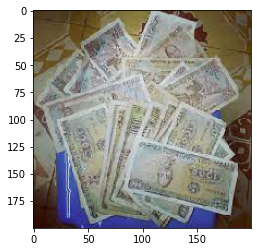

In [238]:
img = load_image('1k(2).jpg')
plt.imshow(img)
img = img_to_array(img)
img = img.reshape(1,200,200,3)  
#img = tf.image.adjust_brightness(img,0.2)
#img = tf.image.adjust_contrast(img,1)
img.shape
result = model.predict(img)
print(result)
np.argmax(result) 
print('độ chính xác:', int(np.max(result)*100),'%')
print('expectation',labels[np.argmax(result)])

[[7.4643516e-08 1.2933234e-05 9.9892032e-01 7.4598042e-06 5.3172801e-07
  6.0713000e-04 4.3262672e-04 3.6294601e-09 2.7737741e-07 1.8691700e-05]]
độ chính xác: 99 %
expectation 1k


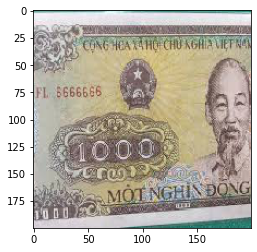

In [239]:
img = load_image('1k(5).jpg')
plt.imshow(img)
img = img_to_array(img)
img = img.reshape(1,200,200,3)  
#img = tf.image.adjust_brightness(img,0.2)
#img = tf.image.adjust_contrast(img,1)
img.shape
result = model.predict(img)
print(result)
np.argmax(result) 
print('độ chính xác:', int(np.max(result)*100),'%')
print('expectation',labels[np.argmax(result)])

[[5.71879100e-10 1.14273986e-10 1.24612960e-08 4.57908537e-11
  9.79504211e-09 9.99993801e-01 1.84143545e-08 4.07261678e-06
  1.75783907e-06 3.87845546e-07]]
độ chính xác: 99 %
expectation 2k


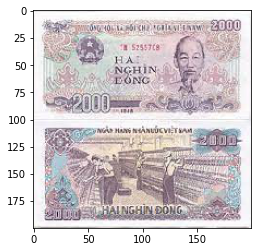

In [250]:
img = load_image('2k.jpg')
plt.imshow(img)
img = img_to_array(img)
img = img.reshape(1,200,200,3)  
#img = tf.image.adjust_brightness(img,0.2)
#img = tf.image.adjust_contrast(img,1)
img.shape
result = model.predict(img)
print(result)
np.argmax(result) 
print('độ chính xác:', int(np.max(result)*100),'%')
print('expectation',labels[np.argmax(result)])

[[2.5467719e-07 2.4306487e-04 2.3251269e-03 5.7616282e-02 2.8694451e-13
  2.4424319e-06 1.0082322e-07 3.6810027e-07 9.3590635e-01 3.9060020e-03]]
độ chính xác: 93 %
expectation 5k


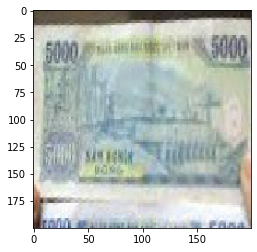

In [252]:
img = load_image('5k.jpg')
plt.imshow(img)
img = img_to_array(img)
img = img.reshape(1,200,200,3)  
#img = tf.image.adjust_brightness(img,0.2)
#img = tf.image.adjust_contrast(img,1)
img.shape
result = model.predict(img)
print(result)
np.argmax(result) 
print('độ chính xác:', int(np.max(result)*100),'%')
print('expectation',labels[np.argmax(result)])

[[6.8407186e-05 2.7341535e-08 7.4150111e-04 4.8257893e-06 2.6766744e-02
  9.0046696e-02 1.0645963e-05 8.4826893e-01 2.8749077e-02 5.3431476e-03]]
độ chính xác: 84 %
expectation 20k


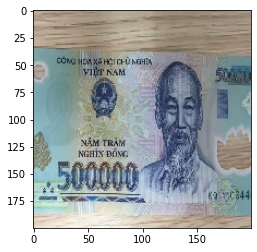

In [255]:
img = load_image('500k.jfif')
plt.imshow(img)
img = img_to_array(img)
img = img.reshape(1,200,200,3)  
#img = tf.image.adjust_brightness(img,0.2)
#img = tf.image.adjust_contrast(img,1)
img.shape
result = model.predict(img)
print(result)
np.argmax(result) 
print('độ chính xác:', int(np.max(result)*100),'%')
print('expectation',labels[np.argmax(result)])

[[2.7769325e-09 9.4465635e-13 2.3220358e-07 1.1717496e-10 9.8908573e-01
  3.1226914e-04 7.4037200e-07 1.0538074e-02 1.4848577e-05 4.8145972e-05]]
độ chính xác: 98 %
expectation 500k


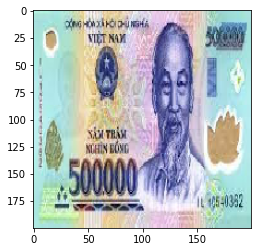

In [263]:
img = load_image('500k.jpg')
plt.imshow(img)
img = img_to_array(img)
img = img.reshape(1,200,200,3)  
#img = tf.image.adjust_brightness(img,0.2)
#img = tf.image.adjust_contrast(img,1)
img.shape
result = model.predict(img)
print(result)
np.argmax(result) 
print('độ chính xác:', int(np.max(result)*100),'%')
print('expectation',labels[np.argmax(result)])

[[3.5439378e-08 9.1175484e-10 6.6083061e-08 3.4585442e-11 9.9999905e-01
  7.1387683e-07 8.0569514e-08 3.2408366e-08 2.8088070e-11 1.1187910e-07]]
độ chính xác: 99 %
expectation 500k


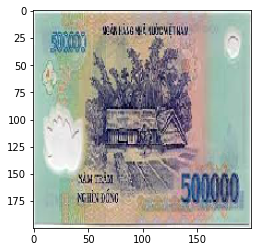

In [268]:
img = load_image('500k.jpg')
plt.imshow(img)
img = img_to_array(img)
img = img.reshape(1,200,200,3)  
#img = tf.image.adjust_brightness(img,0.2)
#img = tf.image.adjust_contrast(img,1)
img.shape
result = model.predict(img)
print(result)
np.argmax(result) 
print('độ chính xác:', int(np.max(result)*100),'%')
print('expectation',labels[np.argmax(result)])

[[1.09280696e-10 1.44188335e-14 1.28574356e-11 5.95376051e-08
  1.00000000e+00 5.75982669e-16 9.20673528e-17 2.74986734e-19
  2.35941163e-14 2.60123954e-11]]
độ chính xác: 100 %
expectation 500k


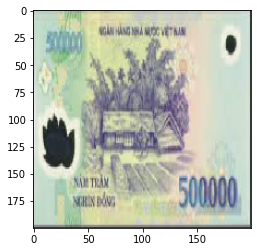

In [271]:
img = load_image('500k.jpg')
plt.imshow(img)
img = img_to_array(img)
img = img.reshape(1,200,200,3)  
#img = tf.image.adjust_brightness(img,0.2)
#img = tf.image.adjust_contrast(img,1)
img.shape
result = model.predict(img)
print(result)
np.argmax(result) 
print('độ chính xác:', int(np.max(result)*100),'%')
print('expectation',labels[np.argmax(result)])

In [272]:
y_pred = model.predict(x_train)

In [275]:
np.argmax(y_pred,axis=1)

array([1, 1, 6, 7, 5, 8, 7, 5, 9, 1, 8, 9, 1, 9, 5, 2, 7, 0, 3, 8, 2, 0,
       4, 7, 3, 8, 2, 7, 5, 8, 7, 9, 7, 6, 4, 9, 1, 6, 6, 7, 2, 2, 6, 1,
       3, 1, 1, 0, 8, 7, 9, 4, 0, 0, 4, 8, 4, 2, 6, 0, 4, 8, 2, 6, 3, 4,
       8, 0, 7, 1, 0, 7, 1, 5, 3, 0, 0, 2, 5, 3, 7, 5, 5, 0, 0, 7, 5, 8,
       0, 1, 5, 4, 1, 3, 2, 8, 6, 3, 3, 2, 5, 7, 3, 9, 8, 7, 3, 9, 2, 0,
       8, 1, 5, 4, 3, 5, 5, 9, 5, 6, 8, 1, 2, 0, 9, 3, 4, 4, 2, 8, 0, 5,
       3, 8, 1, 0, 1, 9, 5, 6, 4, 0, 1, 6, 3, 0, 8, 8, 2, 3, 8, 1, 0, 6,
       4, 0, 0, 2, 2, 7, 3, 6, 3, 1, 2, 0, 7, 9, 5, 0, 1, 4, 3, 7, 1, 7,
       5, 3, 2, 7, 6, 6, 9, 0, 4, 4, 6, 8, 3, 3, 5, 6, 6, 7, 9, 1, 9, 6,
       5, 2, 8, 1, 7, 7, 7, 4, 0, 8, 2, 6, 6, 9, 9, 5, 0, 4, 1, 2, 0, 9,
       6, 5, 3, 1, 0, 2, 1, 1, 9, 4, 3, 5, 8, 2, 9, 1, 4, 4, 2, 6, 4, 1,
       2, 6, 4, 8, 5, 5, 0, 8, 0, 6, 0, 1, 8, 9, 9, 8, 6, 3, 5, 8, 7, 1,
       2, 4, 3, 4, 4, 7, 9, 8, 8, 6, 4, 3, 9, 4, 9, 5, 4, 9, 9, 6, 5, 2,
       0, 2, 8, 9, 9, 0, 2, 1, 1, 6, 7, 5, 6, 5, 9,

In [276]:
np.argmax(y_train,axis=1)

array([1, 1, 6, 7, 5, 8, 7, 5, 9, 1, 8, 9, 1, 9, 5, 2, 7, 0, 3, 8, 2, 0,
       4, 7, 3, 8, 2, 7, 5, 8, 7, 9, 7, 6, 4, 9, 1, 6, 6, 7, 2, 2, 6, 1,
       3, 1, 1, 0, 8, 7, 9, 4, 0, 0, 4, 8, 4, 2, 6, 0, 4, 8, 2, 6, 3, 4,
       8, 0, 7, 1, 0, 7, 1, 5, 3, 0, 0, 2, 5, 3, 7, 5, 5, 0, 0, 7, 5, 8,
       0, 1, 5, 4, 1, 3, 2, 8, 6, 3, 3, 2, 5, 7, 3, 9, 8, 7, 3, 9, 2, 0,
       8, 1, 5, 4, 3, 5, 5, 9, 5, 6, 8, 1, 2, 0, 9, 3, 4, 4, 2, 8, 0, 5,
       3, 8, 1, 0, 1, 9, 5, 6, 4, 0, 1, 6, 3, 0, 8, 8, 2, 3, 8, 1, 0, 6,
       4, 0, 0, 2, 2, 7, 3, 6, 3, 1, 2, 0, 7, 9, 5, 0, 1, 4, 3, 7, 1, 7,
       5, 3, 2, 7, 6, 6, 9, 0, 4, 4, 6, 8, 3, 3, 5, 6, 6, 7, 9, 1, 9, 6,
       5, 2, 8, 1, 7, 7, 7, 4, 0, 8, 2, 6, 6, 9, 9, 5, 0, 4, 1, 2, 0, 9,
       6, 5, 3, 1, 0, 2, 1, 1, 9, 4, 3, 5, 8, 2, 9, 1, 4, 4, 2, 6, 4, 1,
       2, 6, 4, 8, 5, 5, 0, 8, 0, 6, 0, 1, 8, 9, 9, 8, 6, 3, 5, 8, 7, 1,
       2, 4, 3, 4, 4, 7, 9, 8, 8, 6, 4, 3, 9, 4, 9, 5, 4, 9, 9, 6, 5, 2,
       0, 2, 8, 9, 9, 0, 2, 1, 1, 6, 7, 5, 6, 5, 9,

In [278]:
from sklearn.metrics import confusion_matrix

In [282]:
matrix = confusion_matrix(np.argmax(y_train,axis=1),np.argmax(y_pred,axis=1), labels=None)

In [ ]:
['50k','10k','1k','200k','500k','2k','500đ','20k','5k','100k']

[Text(0, 0.5, '50k'),
 Text(0, 1.5, '10k'),
 Text(0, 2.5, '1k'),
 Text(0, 3.5, '200k'),
 Text(0, 4.5, '500k'),
 Text(0, 5.5, '2k'),
 Text(0, 6.5, '500đ'),
 Text(0, 7.5, '20k'),
 Text(0, 8.5, '5k'),
 Text(0, 9.5, '100k')]

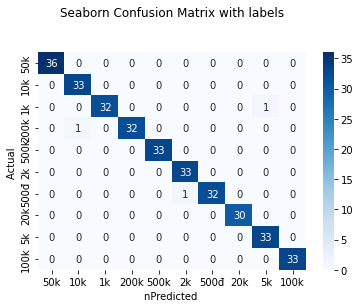

In [283]:
import seaborn as sns
import matplotlib.pyplot as plt

ax = sns.heatmap(matrix, annot=True, cmap='Blues')

ax.set_title('Seaborn Confusion Matrix with labels\n\n');
ax.set_xlabel('nPredicted ')
ax.set_ylabel('Actual ');

## Ticket labels - List must be in alphabetical order
ax.xaxis.set_ticklabels(['50k','10k','1k','200k','500k','2k','500đ','20k','5k','100k'])
ax.yaxis.set_ticklabels(['50k','10k','1k','200k','500k','2k','500đ','20k','5k','100k'])

## Display the